In [3]:
import os
import pandas as pd
import numpy as np


In [4]:
infilepath = r"P:\EW_analysis_non_git\analysis\writing\writing_data"
classified_index_df = pd.read_csv(os.path.join(infilepath, 'classification_sunjeev.csv'))
orig_index_df = pd.read_csv(os.path.join(infilepath, 'classify_statements_wi.csv'))

In [5]:
classified_index_df = classified_index_df.dropna()
orig_index_df = orig_index_df.loc[classified_index_df.index]

In [6]:
# checking that the writing was the same.

import difflib as dfl

orig_index_df['similarity'] = dfl.SequenceMatcher(None,orig_index_df['writing'],classified_index_df['writing']).ratio()

Now compare manual classification to LinearSVC/NaiveBayes version.

In [7]:
orig_index_df.Group.value_counts()

EWRE    26
EW      15
Name: Group, dtype: int64

In [8]:
classified_index_df.Group.value_counts()

EWRE    25
EW      16
Name: Group, dtype: int64

In [9]:
classified_index_df['Group_true'] = orig_index_df.Group

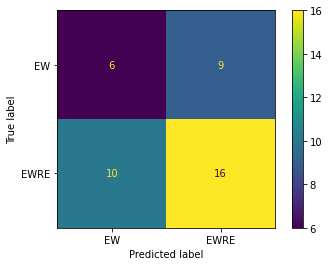

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(classified_index_df.Group_true, classified_index_df.Group, labels = ['EW','EWRE'])

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['EW','EWRE'])
disp.plot()

(array([0.5, 1.5]), [Text(0, 0.5, 'EW'), Text(0, 1.5, 'EWRE')])

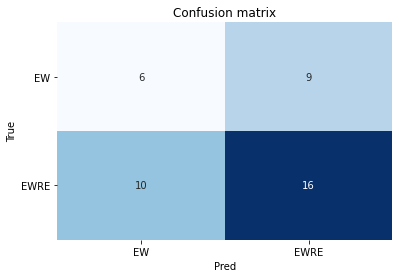

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classified_index_df.Group_true, classified_index_df.Group, labels = ['EW','EWRE'])
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels= ['EW','EWRE'], yticklabels=['EW','EWRE'], title="Confusion matrix")
plt.yticks(rotation=0)

In [12]:
from sklearn.metrics import precision_recall_fscore_support
prec, rec, f1,_ = precision_recall_fscore_support(classified_index_df.Group_true, classified_index_df.Group)

In [13]:
print(prec)
print(rec)
print(f1)

[0.375 0.64 ]
[0.4        0.61538462]
[0.38709677 0.62745098]
